# Homework 02

## River Kelly
### CSCI-347
### Feb 16, 2022

> **Collaborators**: Kyler Gappa

Show your work. Include any code snippets you used to generate an answer, using comments in the code to clearly indicate which problem corresponds to which code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

data    = np.chararray((7, 3), itemsize=6)

data[0] = np.array(['red',    'yes',  'north'])
data[1] = np.array(['blue',   'no',   'south'])
data[2] = np.array(['yellow', 'no',   'east'])
data[3] = np.array(['yellow', 'no',   'west'])
data[4] = np.array(['red',    'yes',  'north'])
data[5] = np.array(['yellow', 'yes',  'north'])
data[6] = np.array(['blue',   'no',   'west'])

data

chararray([[b'red', b'yes', b'north'],
           [b'blue', b'no', b'south'],
           [b'yellow', b'no', b'east'],
           [b'yellow', b'no', b'west'],
           [b'red', b'yes', b'north'],
           [b'yellow', b'yes', b'north'],
           [b'blue', b'no', b'west']], dtype='|S6')

# Question 1

Use matplotlib to create a bar plot for the counts of the variable X2 . Make sure to label the axis.

Text(0.5, 1.0, 'Yes/No Bar Graph')

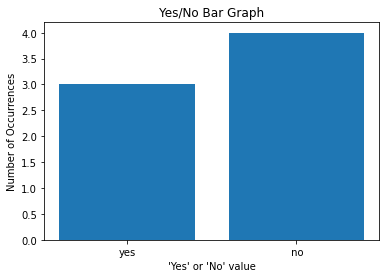

In [ ]:
target = data
np.unique(target)
target_x2 = target[:,1]

counts = [sum(target_x2==b'yes'), sum(target_x2==b'no')]
target_names = ['yes' ,' no']

plt.bar(target_names, counts)
plt.ylabel('Number of Occurrences')
plt.xlabel("'Yes' or 'No' value")
plt.title('Yes/No Bar Graph')

# 2. (2 points)

Use one-hot encoding to transform all the categorical attributes to numerical values.

Write down the transformed data matrix. (In what follows, we will referred to the transformed data matrix as Y).

In [ ]:
oneHotData = np.ndarray((7, 9))

for row in range(data.shape[0]):
    row_array = data[row,:]
    color       = row_array[0]
    yes_no      = row_array[1]
    direction   = row_array[2]
    # empty row for encoded data
    hot_data_row = np.array([0] * 9)
    # encode color
    if color == b'red': hot_data_row[0] = 1
    elif color == b'blue': hot_data_row[1] = 1
    elif color == b'yellow': hot_data_row[2] = 1
    # encode yes/no
    if yes_no == b'yes': hot_data_row[3] = 1
    else: hot_data_row[4] = 1
    # encode direction (north, south, east, and west)
    if   direction == b'north': hot_data_row[5] = 1
    elif direction == b'south': hot_data_row[6] = 1
    elif direction == b'east': hot_data_row[7] = 1
    elif direction == b'west': hot_data_row[8] = 1
    # set row values on encoded matrix
    oneHotData[row] = hot_data_row

# print one-hot encoded matrix
oneHotData

array([[1., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 1., 1., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1.]])

# Question 3

What is the Euclidean distance between instance x 2 (second row) and x 7 (seventh row) after applying one-hot encoding.

In [ ]:
def euclideanDistance(m, row1Num, row2Num):
    x1 = m[row1Num,:]
    x2 = m[row2Num,:]
    answer = 0
    for i in range(m.shape[1]):
        answer += (x1[i] - x2[i]) ** 2
    return math.sqrt(answer)

print("Euclidean Distance (x2 and x7): ", euclideanDistance(oneHotData, 1, 6))

Euclidean Distance (x2 and x7):  1.4142135623730951


# Question 4

What is the cosine similarity (cosine of the angle) between data instance x 2 and data instance x 7 after applying one-hot encoding?

In [ ]:
def cosineOfRows(m, row1Num, row2Num):
    x1 = m[row1Num,:]
    x2 = m[row2Num,:]
    top = 0
    bottom_left = 0
    bottom_right = 0
    for i in range(m.shape[1]):
        top += x1[i] * x2[i]
        bottom_left += x1[i] ** 2
        bottom_right += x2[i] ** 2
    return top / (math.sqrt(bottom_left) * math.sqrt(bottom_right))

print("Cosine x2 and x7: ", cosineOfRows(oneHotData, 1, 6))

Cosine x2 and x7:  0.6666666666666667


# Question 5

What is the Hamming distance between data instance x2 and data instance x7 after applying one-hot encoding?

In [ ]:
def hammingDistance(m, row1Num, row2Num):
    x1 = m[row1Num,:]
    x2 = m[row2Num,:]
    sum = 0
    for i in range(m.shape[1]):
        if (x1[i] == 1 and x2[i] == 0) or (x1[i] == 0 and x2[i] == 1):
            sum += 1
    return sum

print("Hamming Distance (XOR) of x2 and x7: ", hammingDistance(oneHotData, 1, 6))

Hamming Distance (XOR) of x2 and x7:  2


# Question 6

What is the Jaccard similarity between data instance x 2 and x 7 after applying
one-hot encoding?

In [ ]:
def jaccardSimilarity(m, row1Num, row2Num):
    x1 = m[row1Num,:]
    x2 = m[row2Num,:]
    top = 0
    bottom = 0
    for i in range(m.shape[1]):
        # top
        if (x1[i] == x2[i]): top += 1
        # bottom
        if (x1[i] != x2[i]): bottom += 1
    return (top / bottom)

jaccardSimilarity(oneHotData, 1, 6)

3.5

# Question 7

What is the multi-dimensional mean of `Y`?

In [ ]:
def multiDimensionalMean(m):
    mean_data = [0] * m.shape[1]
    for row in range(m.shape[0]):
        for col in range(m.shape[1]):
            mean_data[col] += m[row, col]
    for col in range(len(mean_data)):
        mean_data[col] = mean_data[col] / m.shape[0]
    return mean_data

multiDimensionalMean(oneHotData)

[0.2857142857142857,
 0.2857142857142857,
 0.42857142857142855,
 0.42857142857142855,
 0.5714285714285714,
 0.42857142857142855,
 0.14285714285714285,
 0.14285714285714285,
 0.2857142857142857]

# Question 8

What is the estimated variance of the first column of Y ?

In [ ]:
def coVariance(m, col1Num, col2Num):
    col1 = m[:,col1Num]
    col2 = m[:,col2Num]
    answer = 0
    for i in range(m.shape[0]):
        answer += (col1[i] - col1.mean()) * (col2[i] - col2.mean())
    return answer / (m.shape[0] - 1)

print("Estimated variance of the first column of Y: {!s}".format(coVariance(oneHotData, 0, 0)))

Estimated variance of the first column of Y: 0.23809523809523814


In [ ]:
# We can double check this by:
print('Double check with np built in function: {!s}'.format(np.var(oneHotData[:,0], ddof=1)))

Double check with np built in function: 0.23809523809523814


# Question 9

What is the resulting matrix after applying standard (z-score) normalization to the matrix `Y`. In the following, we will call this matrix `Z`.

In [ ]:
def zScore(m):
    z_score = np.ndarray(m.shape)
    for row in range(z_score.shape[0]):
        for col in range(z_score.shape[1]):
            z_score[row, col] = 0
            x_ij = m[row, col]
            mean = m[:,col].mean()
            div = math.sqrt(coVariance(m, col, col))
            z_score[row, col] = (x_ij - mean) / div
    return z_score

zScore(oneHotData)

array([[ 1.46385011, -0.58554004, -0.80178373,  1.06904497, -1.06904497,
         1.06904497, -0.37796447, -0.37796447, -0.58554004],
       [-0.58554004,  1.46385011, -0.80178373, -0.80178373,  0.80178373,
        -0.80178373,  2.26778684, -0.37796447, -0.58554004],
       [-0.58554004, -0.58554004,  1.06904497, -0.80178373,  0.80178373,
        -0.80178373, -0.37796447,  2.26778684, -0.58554004],
       [-0.58554004, -0.58554004,  1.06904497, -0.80178373,  0.80178373,
        -0.80178373, -0.37796447, -0.37796447,  1.46385011],
       [ 1.46385011, -0.58554004, -0.80178373,  1.06904497, -1.06904497,
         1.06904497, -0.37796447, -0.37796447, -0.58554004],
       [-0.58554004, -0.58554004,  1.06904497,  1.06904497, -1.06904497,
         1.06904497, -0.37796447, -0.37796447, -0.58554004],
       [-0.58554004,  1.46385011, -0.80178373, -0.80178373,  0.80178373,
        -0.80178373, -0.37796447, -0.37796447,  1.46385011]])

# Question 10

What is the multi-dimensional mean of `Z`?

In [ ]:
multiDimensionalMean(zScore(oneHotData))

[0.0,
 6.344131569286608e-17,
 0.0,
 1.586032892321652e-17,
 1.1102230246251565e-16,
 1.586032892321652e-17,
 4.7580986769649563e-17,
 4.7580986769649563e-17,
 3.172065784643304e-17]

# Question 11

Let z i be the i-th row of Z. What is Euclidean distance between `z2` and `z7`?

In [ ]:
euclideanDistance(zScore(oneHotData), 1, 6)

3.3466401061363023